In [1]:
import os
import torch
from utils import inductive_split

folder = '../cache'
files = os.listdir(folder)

data = []
for file in files:
    filepath = os.path.join(folder, file)
    data.append(torch.load(filepath))


In [34]:
corr

tensor([[ 1.0000e+00, -7.5306e-02, -8.3659e-02,  2.9530e-01, -9.8294e-02,
         -9.8728e-02,  1.0585e-01, -5.6345e-02, -2.4375e-02,  1.9092e-01,
         -6.6706e-02, -3.0591e-03,  2.7288e-01,  1.6121e-02,  2.5838e-01,
          1.6416e-02,  1.2641e-01,  3.0874e-02, -3.7655e-02, -2.8740e-02,
         -4.1860e-02, -1.0479e-01,  2.8332e-02, -1.1983e-02, -2.0931e-02,
         -1.8677e-02,  3.1492e-02],
        [-7.5306e-02,  1.0000e+00,  4.1573e-01,  1.0283e-01,  5.5100e-01,
         -1.6262e-02,  2.7669e-02, -6.6404e-02, -9.1841e-03,  9.4615e-03,
          1.6034e-01,  1.7808e-02,  8.4344e-03,  3.6379e-01,  1.2135e-02,
         -5.8143e-01,  3.4963e-02, -1.3001e-03, -5.8089e-01,  9.5891e-03,
          7.0715e-02,  4.9002e-01,  1.4272e-02, -1.7163e-02, -1.8692e-02,
         -3.6756e-03, -2.8560e-01],
        [-8.3659e-02,  4.1573e-01,  1.0000e+00,  3.2696e-01,  9.5569e-01,
          6.0431e-02, -6.3312e-02, -9.4837e-02,  1.1862e-02, -9.6848e-02,
          3.7449e-01, -3.6086e-02, -1.10

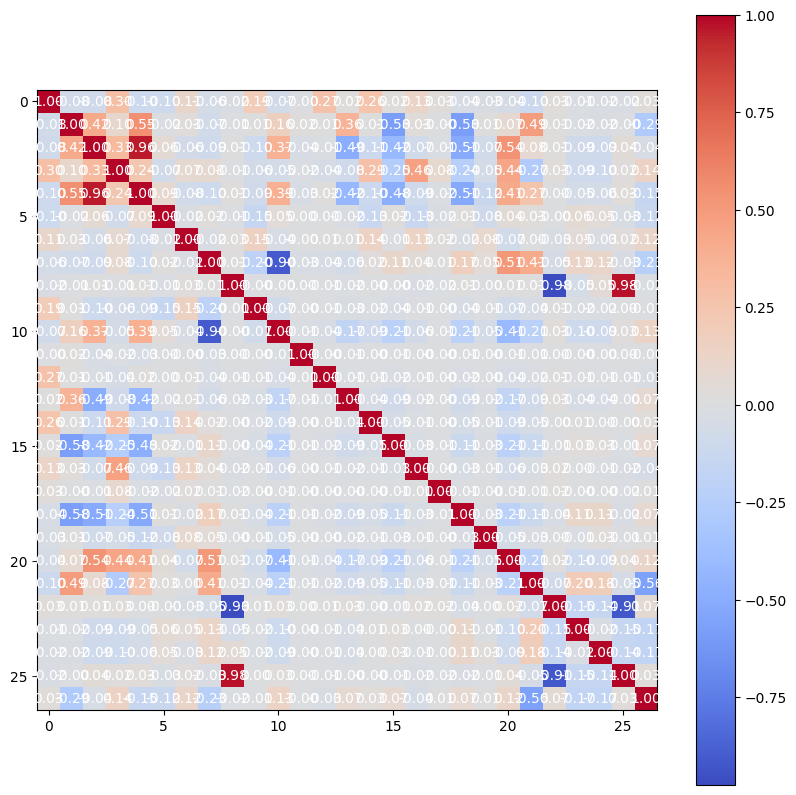

In [33]:
import matplotlib.pyplot as plt
def correlation_matrix(tensor):
    tensor = tensor - tensor.mean(dim=0)
    cov = torch.mm(tensor.T, tensor) / tensor.size(0)
    std = torch.sqrt(torch.diag(cov))
    corr = cov / torch.outer(std, std)
    return corr

tensor = torch.cat((data[0].x, data[0].y.view(-1, 1)), dim=1)
# tensor.shape
corr = correlation_matrix(tensor)

corr_np = corr.numpy()

# Create a new figure
plt.figure(figsize=(10, 10))

# Create a heatmap
plt.imshow(corr_np, cmap='coolwarm', interpolation='nearest')

# Create a colorbar
plt.colorbar()

# Add the values of the matrix on the heatmap
for i in range(corr_np.shape[0]):
    for j in range(corr_np.shape[1]):
        plt.text(j, i, format(corr_np[i, j], ".2f"), ha="center", va="center", color="w")

plt.show()

In [2]:
train, val, test = inductive_split(data, 0.5, 0.25, 0.25, ['xloc', 'yloc', 'cell'])

IndexError: too many indices for tensor of dimension 2

In [11]:
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, num_features):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)

        return x.squeeze()
    
# Create the model and optimizer
model = GCN(num_features=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
model.train()
for epoch in range(100):
    for data in loader:  # Iterate over each graph
        optimizer.zero_grad()
        out = model(data)
        loss = torch.nn.functional.mse_loss(out, data.y)
        loss.backward()
        optimizer.step()

[Data(x=[7323, 22], edge_index=[2, 120929], edge_attr=[120929], y=[7323])]